Empty DataFrame
Columns: [freeze_encoder, task_name, weights, val_acc_rec_balanced, train_frac, accuracy]
Index: []


/tmp/ipykernel_3946879/1718294815.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  runs_df[runs_df.task_name==task_name][runs_df["weights"]=="eegclip_frozen"]["accuracy"].mean()


nan

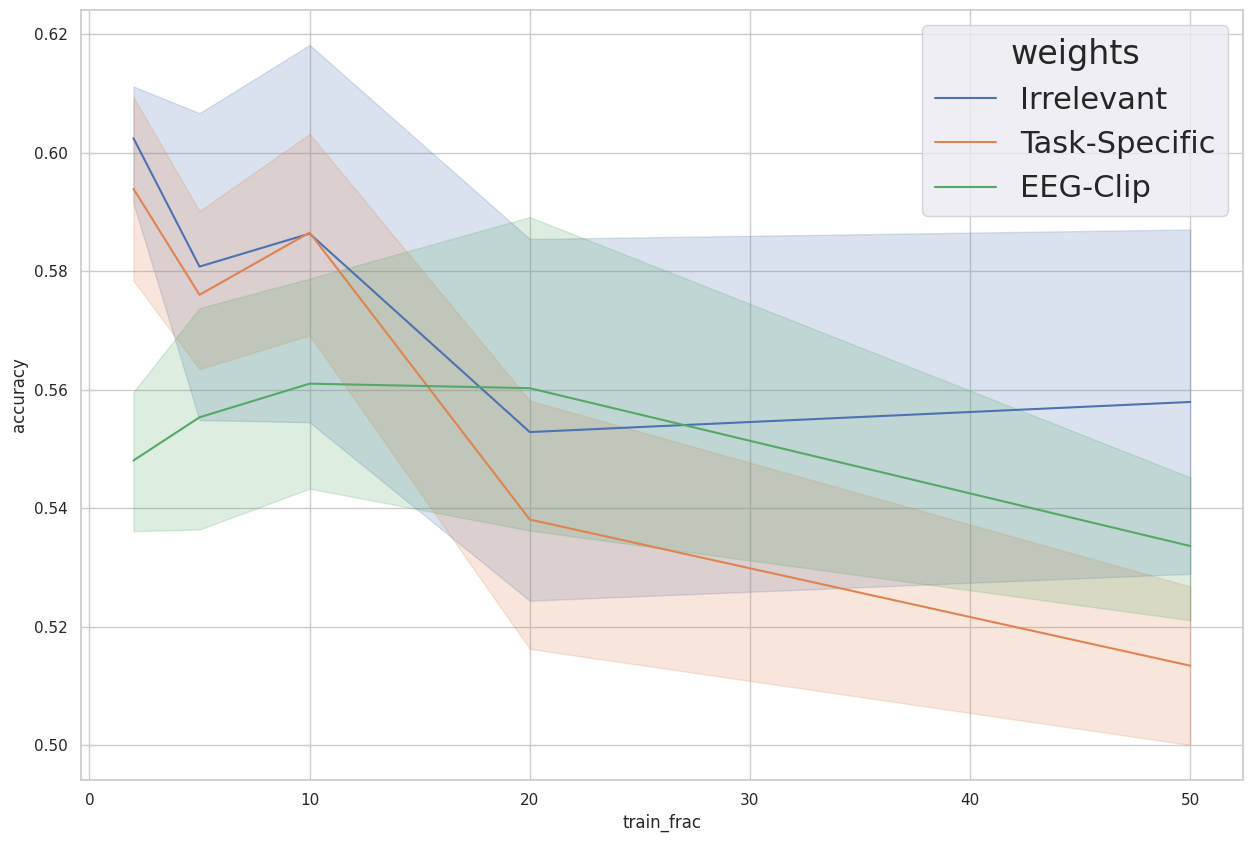

In [2]:
import pandas as pd 
import numpy as np

runs_df = pd.read_csv("/nfs/norasys/notebooks/camaret/neuro_ai/EEGClip/results/classif_few_shot_test_set.csv")


# only keep "freeze_encoder,task_name,weights, val_acc_rec_balanced" columns
runs_df = runs_df[["freeze_encoder", "task_name", "weights", "val_acc_rec_balanced","train_frac"]]
runs_df["accuracy"] = runs_df["val_acc_rec_balanced"]

# weights = weights + ["_trainable" if x else "_frozen" for x in runs_df["freeze_encoder"]]

runs_df["weights"] = runs_df["weights"] + ["_trainable" if not x else "_frozen" for x in runs_df["freeze_encoder"]]

#print(runs_df.head())

# for each task, plot the accuracy distribution for each weight

#runs_df["weights"] = runs_df["weights"] + ["_trainable" if x else "_frozen" for x in runs_df["freeze_encoder"]]
# drop lines with freeze_encoder = True and weights = random at the same time
runs_df = runs_df[~(runs_df["weights"]=="random_frozen")]

# print row where freeze_encoder = True and weights = random
print(runs_df[(runs_df["freeze_encoder"]==True) & (runs_df["weights"]=="random")])

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# plot for each of the 6 tasks
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

"""
for i, task in enumerate(["pathological","gender","under_50","medication"]):
    ax = axs[i//2, i%2]
    # plot accuracy vs train_frac for each weight
    sns.lineplot(data=runs_df[runs_df.task_name==task], x="train_frac", y="accuracy", hue="weights", ax=ax, )
    ax.set_title(task)
    ax.set_ylim(0.5, np.max(runs_df[runs_df.task_name==task]["accuracy"]))
    ax.set_xlabel("train_frac")
    ax.set_ylabel("accuracy")
"""
# remove occurences when train_frac = 1
runs_df = runs_df[runs_df.train_frac != 1]
# rename "weights" elements : "eegclip_frozen -> EEG-Clip, under_50_frozen -> Under 50, pathological_frozen -> Pathological
runs_df["weights"] = runs_df["weights"].replace(["eegclip_frozen", "pathological_frozen", "random_trainable"], ["EEG-Clip", "Irrelevant ", "Task-Specific"])
task_name = "medication"
sns.set(font_scale=2)
sns.lineplot(data=runs_df[runs_df.task_name==task_name], x="train_frac", y="accuracy", hue="weights", ax=ax, errorbar=('ci', 80))
# 
runs_df[runs_df.task_name==task_name][runs_df["weights"]=="eegclip_frozen"]["accuracy"].mean()



In [7]:
runs_df[runs_df.task_name==task_name][runs_df.weights=="EEG-Clip"]

/tmp/ipykernel_3946879/2694694153.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  runs_df[runs_df.task_name==task_name][runs_df.weights=="EEG-Clip"]


,freeze_encoder,task_name,weights,val_acc_rec_balanced,train_frac,accuracy
3,True,medication,EEG-Clip,0.541068,50,0.541068
7,True,medication,EEG-Clip,0.565553,50,0.565553
11,True,medication,EEG-Clip,0.521961,50,0.521961
15,True,medication,EEG-Clip,0.502944,50,0.502944
19,True,medication,EEG-Clip,0.536412,50,0.536412
23,True,medication,EEG-Clip,0.540197,20,0.540197
27,True,medication,EEG-Clip,0.596617,20,0.596617
31,True,medication,EEG-Clip,0.508592,20,0.508592
35,True,medication,EEG-Clip,0.628733,20,0.628733
39,True,medication,EEG-Clip,0.527038,20,0.527038


In [8]:
# for each train_frac, compute wicoxon test between EEG-Clip and Task-Specific
from scipy.stats import wilcoxon
for train_frac in runs_df.train_frac.unique():
    eegclip = runs_df[(runs_df.task_name==task_name) & (runs_df.weights=="EEG-Clip") & (runs_df.train_frac==train_frac)]["accuracy"]
    task_specific = runs_df[(runs_df.task_name==task_name) & (runs_df.weights=="Task-Specific") & (runs_df.train_frac==train_frac)]["accuracy"]
    if len(eegclip) > 0 and len(task_specific) > 0:
        stat, p = wilcoxon(eegclip, task_specific)
        print(f"Train frac: {train_frac}, Wilcoxon test: stat={stat}, p={p}")

Train frac: 50, Wilcoxon test: stat=3.0, p=0.3125
Train frac: 20, Wilcoxon test: stat=0.0, p=0.125
Train frac: 10, Wilcoxon test: stat=0.0, p=0.0625
Train frac: 5, Wilcoxon test: stat=4.0, p=0.4375
Train frac: 2, Wilcoxon test: stat=0.0, p=0.0625
